<a href="https://colab.research.google.com/github/SA2804/zepto-eda/blob/main/Zepto_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Step 0: Load Essentials


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the CSV ( Handle Encoding )

In [6]:
df = pd.read_csv('/content/zepto_v2.csv',encoding='cp1252 ') # cp1252 is Microsoft’s superset of ISO-8859-1 -> So if I open a CSV with fancy characters, UTF-8 fails, ISO-8859-1 skips, but cp1252 survives
df.head() # fancy characters like smart quotes,curly braces , trademark symbol etc

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
0,Fruits & Vegetables,Onion,2500,16,3,2100,1000,False,1
1,Fruits & Vegetables,Tomato Hybrid,4200,16,3,3500,1000,False,1
2,Fruits & Vegetables,Tender Coconut,5100,15,3,4300,58,False,1
3,Fruits & Vegetables,Coriander Leaves,2000,15,3,1700,100,False,100
4,Fruits & Vegetables,Ladies Finger,1400,14,3,1200,250,False,250


# Step 2: Inspect Raw Dataset

In [17]:
df.head()
df.tail()
df.info()
df.describe()
cols=df.columns # columns is a property


Index(['Category', 'name', 'mrp', 'discountPercent', 'availableQuantity',
       'discountedSellingPrice', 'weightInGms', 'outOfStock', 'quantity'],
      dtype='object')

# Step 3: Basic Cleaning

In [18]:
# check for missing data
df.isnull().sum()

,0
Category,0
name,0
mrp,0
discountPercent,0
availableQuantity,0
discountedSellingPrice,0
weightInGms,0
outOfStock,0
quantity,0


In [21]:
# check duplicate rows
print(df.duplicated().sum())

2


In [22]:
df.count()

,0
Category,3732
name,3732
mrp,3732
discountPercent,3732
availableQuantity,3732
discountedSellingPrice,3732
weightInGms,3732
outOfStock,3732
quantity,3732


In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.count()

,0
Category,3730
name,3730
mrp,3730
discountPercent,3730
availableQuantity,3730
discountedSellingPrice,3730
weightInGms,3730
outOfStock,3730
quantity,3730


In [26]:
df.nunique() # counts unique values col wise - like a diversity measure

,0
Category,14
name,1681
mrp,266
discountPercent,42
availableQuantity,7
discountedSellingPrice,350
weightInGms,158
outOfStock,2
quantity,143


# Step 4: Category Analysis

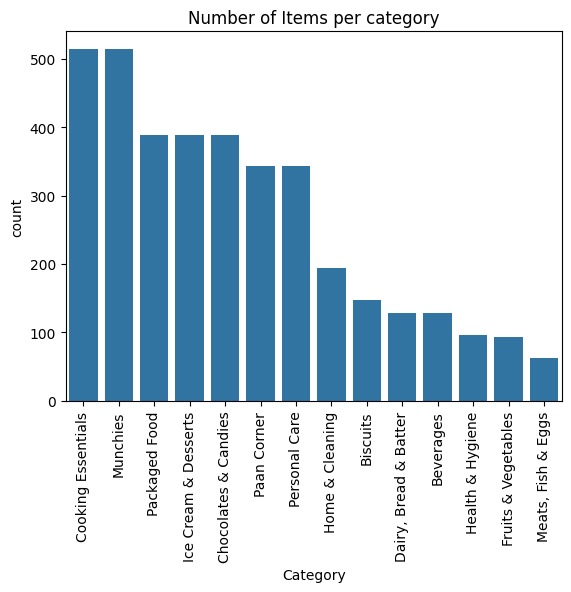

In [31]:
sns.countplot(data=df,x="Category",order=df['Category'].value_counts().index) # order ensures the bar is sorted from the most freq to the least !!
plt.xticks(rotation=90)
plt.title("Number of Items per category")
plt.show()

In [39]:
df["Category"].value_counts()

,count
Category,
Cooking Essentials,514
Munchies,514
Packaged Food,388
Ice Cream & Desserts,388
Chocolates & Candies,388
Paan Corner,343
Personal Care,343
Home & Cleaning,194
Biscuits,147


# Step 5: Price & Discount Distributions

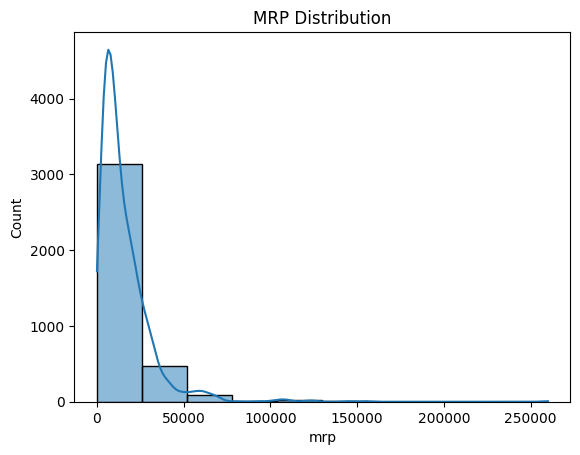

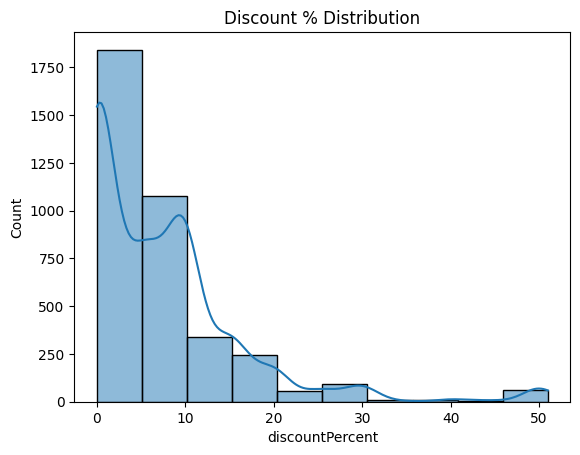

In [43]:
sns.histplot(data=df['mrp'], bins=10, kde=True)
plt.title("MRP Distribution")
plt.show()

sns.histplot(df['discountPercent'], bins=10, kde=True)
plt.title("Discount % Distribution")
plt.show()

In [51]:
max_mrp = df['mrp'].max()
min_mrp = df['mrp'].min()
df[df['mrp']== max_mrp]
df[df['mrp']==min_mrp]

,Category,name,mrp,discountPercent,availableQuantity,discountedSellingPrice,weightInGms,outOfStock,quantity
3606,Home & Cleaning,Cherry Blossom Liquid Shoe Polish Neutral,0,0,1,0,75,False,75


# Step 6: Stock & Availability

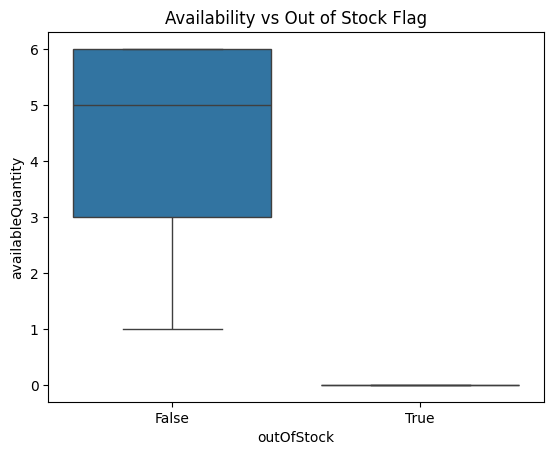

,proportion
outOfStock,
False,87.855228
True,12.144772


In [54]:
sns.boxplot(x='outOfStock', y='availableQuantity', data=df)
plt.title("Availability vs Out of Stock Flag")
plt.show()

df['outOfStock'].value_counts(normalize=True) * 100

In [58]:
df_clean = df.copy()
df_clean.to_csv("clean_zepto_inventory.csv",index=False)

In [59]:
from google.colab import files
files.download("clean_zepto_inventory.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>